In [1]:
import numpy as np

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [69]:
!kaggle datasets download -d karakaggle/kaggle-cat-vs-dog-dataset

 98% 769M/787M [00:11<00:00, 89.5MB/s]
100% 787M/787M [00:11<00:00, 73.7MB/s]


In [4]:
from zipfile import ZipFile
dataset = '/content/kaggle-cat-vs-dog-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('Extracted')

Extracted


In [5]:
import os

Importing all the cat image file names in cat_files

In [6]:
cat_files = os.listdir('/content/kagglecatsanddogs_3367a/PetImages/Cat')

In [7]:
len(cat_files)

12491

Deleting the non-image file in cat_files

In [8]:
cat=[]
for i in cat_files:
  if i!='Thumbs.db':
    cat.append(i)

In [9]:
len(cat)

12490

In [10]:
cat=cat[:1200]

In [11]:
len(cat)

1200

Importing all the dog image files names in dog_files

In [12]:
dog_files = os.listdir('/content/kagglecatsanddogs_3367a/PetImages/Dog')

In [13]:
len(dog_files)

12470

Deleting the non-image file in dog_files

In [14]:
dog=[]
for i in dog_files:
  if i!='Thumbs.db':
    dog.append(i)

In [15]:
len(dog)

12469

In [16]:
dog=dog[:1200]

Making the label for cat and dog

In [17]:
cat_label = [0]*1200
dog_label = [1]*1200

Merging both the labeling in label

In [18]:
label = cat_label+dog_label

In [19]:
from PIL import Image
import cv2

Importing all the image array in the data

In [20]:
data = []

cat_path = '/content/kagglecatsanddogs_3367a/PetImages/Cat/'

for img_path in cat:
  image = Image.open(cat_path+img_path)
  image = image.resize((256,256))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

dog_path = '/content/kagglecatsanddogs_3367a/PetImages/Dog/'

for img_path in dog:
  image = Image.open(dog_path+img_path)
  image = image.resize((256,256))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [21]:
from google.colab.patches import cv2_imshow

In [22]:
len(data)

2400

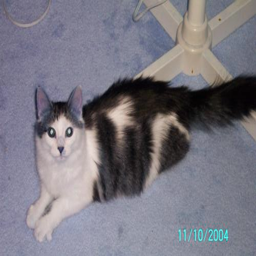

In [23]:
cv2_imshow(data[1])

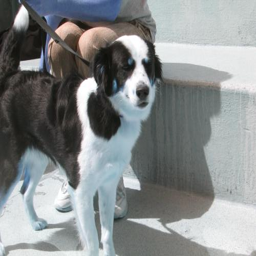

In [24]:
cv2_imshow(data[1590])

In [25]:
X = np.array(data)
y = np.array(label)

In [26]:
X.shape

(2400, 256, 256, 3)

In [27]:
y.shape

(2400,)

Doing train test split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 2)

In [30]:
print(X_train.shape, X_test.shape)

(1800, 256, 256, 3) (600, 256, 256, 3)


In [33]:
X_train[0]

array([[[ 82,  47,  48],
        [ 89,  55,  60],
        [105,  71,  82],
        ...,
        [215, 178, 160],
        [219, 180, 163],
        [219, 180, 163]],

       [[ 93,  58,  61],
        [101,  66,  73],
        [111,  79,  90],
        ...,
        [216, 179, 161],
        [218, 179, 162],
        [216, 177, 160]],

       [[ 92,  59,  65],
        [109,  77,  85],
        [124,  93, 107],
        ...,
        [217, 180, 162],
        [219, 180, 163],
        [216, 177, 160]],

       ...,

       [[146, 113, 101],
        [150, 119, 110],
        [122,  95,  89],
        ...,
        [220, 171, 138],
        [218, 169, 136],
        [218, 169, 136]],

       [[151, 118, 109],
        [134, 104,  98],
        [125,  99,  95],
        ...,
        [226, 176, 144],
        [223, 174, 141],
        [220, 171, 138]],

       [[156, 123, 117],
        [125,  93,  90],
        [141, 114, 113],
        ...,
        [224, 176, 142],
        [230, 181, 146],
        [224, 176, 141]]

Scaling the images by dividing with 255

In [34]:
X_train_scaled, X_test_scaled = X_train/255, X_test/255

In [35]:
X_train_scaled[0]

array([[[0.32156863, 0.18431373, 0.18823529],
        [0.34901961, 0.21568627, 0.23529412],
        [0.41176471, 0.27843137, 0.32156863],
        ...,
        [0.84313725, 0.69803922, 0.62745098],
        [0.85882353, 0.70588235, 0.63921569],
        [0.85882353, 0.70588235, 0.63921569]],

       [[0.36470588, 0.22745098, 0.23921569],
        [0.39607843, 0.25882353, 0.28627451],
        [0.43529412, 0.30980392, 0.35294118],
        ...,
        [0.84705882, 0.70196078, 0.63137255],
        [0.85490196, 0.70196078, 0.63529412],
        [0.84705882, 0.69411765, 0.62745098]],

       [[0.36078431, 0.23137255, 0.25490196],
        [0.42745098, 0.30196078, 0.33333333],
        [0.48627451, 0.36470588, 0.41960784],
        ...,
        [0.85098039, 0.70588235, 0.63529412],
        [0.85882353, 0.70588235, 0.63921569],
        [0.84705882, 0.69411765, 0.62745098]],

       ...,

       [[0.57254902, 0.44313725, 0.39607843],
        [0.58823529, 0.46666667, 0.43137255],
        [0.47843137, 0

In [36]:
from tensorflow.keras import layers, models

Making a CNN model

In [37]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256,256,3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

Fitting the data in the model with epochs = 30

In [39]:
model.fit(X_train_scaled, y_train, epochs=30, validation_data=(X_test_scaled, y_test))

Epoch 1/30
57/57 [==============================] - 24s 163ms/step - loss: 1.2431 - accuracy: 0.5661 - val_loss: 0.9514 - val_accuracy: 0.4350
Epoch 2/30
57/57 [==============================] - 5s 95ms/step - loss: 0.9192 - accuracy: 0.5839 - val_loss: 0.8171 - val_accuracy: 0.5117
Epoch 3/30
57/57 [==============================] - 6s 98ms/step - loss: 0.7855 - accuracy: 0.6089 - val_loss: 0.9206 - val_accuracy: 0.4717
Epoch 4/30
57/57 [==============================] - 6s 98ms/step - loss: 0.6556 - accuracy: 0.6711 - val_loss: 0.8217 - val_accuracy: 0.5333
Epoch 5/30
57/57 [==============================] - 5s 95ms/step - loss: 0.5851 - accuracy: 0.7283 - val_loss: 0.7513 - val_accuracy: 0.5567
Epoch 6/30
57/57 [==============================] - 6s 98ms/step - loss: 0.5818 - accuracy: 0.7117 - val_loss: 0.7603 - val_accuracy: 0.6050
Epoch 7/30
57/57 [==============================] - 5s 94ms/step - loss: 0.4994 - accuracy: 0.7611 - val_loss: 0.7388 - val_accuracy: 0.5800
Epoch 8/30


Exporting the model using pickle

In [40]:
import pickle
pickle.dump(model,open('dog_cat_better.pkl','wb'))

In [41]:
import cv2
from google.colab.patches import cv2_imshow

Testing the model with random images

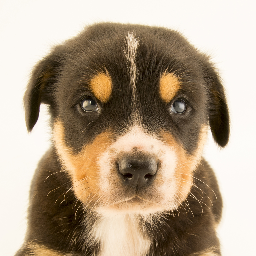

1/1 [==============================] - 0s 123ms/step
[[0.99941015]]
Dog


In [61]:
img_path = 'domestic-dog_thumb_square.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (256,256))
cv2_imshow(img)
img = img/255
img = np.reshape(img,[1,256,256,3])
pred = model.predict(img)
print(pred)
if pred[0]>0.5:
  print('Dog')
else:
  print('Cat')

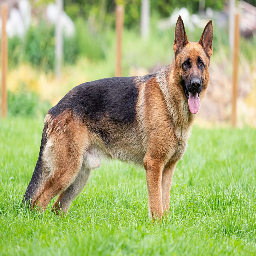

1/1 [==============================] - 0s 21ms/step
[[1.]]
Dog


In [62]:
img_path = 'German-Shepherd-dog-Alsatian.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (256,256))
cv2_imshow(img)
img = img/255
img = np.reshape(img,[1,256,256,3])
pred = model.predict(img)
print(pred)
if pred[0]>0.5:
  print('Dog')
else:
  print('Cat')

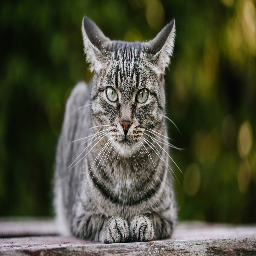

1/1 [==============================] - 0s 19ms/step
[[2.4921982e-07]]
Cat


In [63]:
img_path = 'cat.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img,(256,256))
cv2_imshow(img)
img = img/255
img = np.reshape(img,[1,256,256,3])
pred = model.predict(img)
print(pred)
if pred[0]>0.5:
  print('Dog')
else:
  print('Cat')

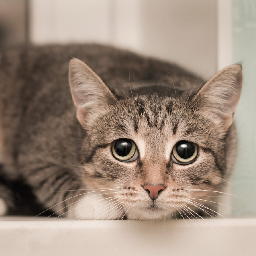

1/1 [==============================] - 0s 22ms/step
[[0.00012542]]
Cat


In [64]:
img_path = 'Cat_s_Mind.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img,(256,256))
cv2_imshow(img)
img = img/255
img = np.reshape(img,[1,256,256,3])
pred = model.predict(img)
print(pred)
if pred[0]>0.5:
  print('Dog')
else:
  print('Cat')

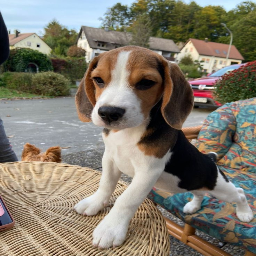

1/1 [==============================] - 0s 20ms/step
[[1.]]
Dog


In [65]:
img_path = 'Ded.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img,(256,256))
cv2_imshow(img)
img = img/255
img = np.reshape(img,[1,256,256,3])
pred = model.predict(img)
print(pred)
if pred[0]>0.5:
  print('Dog')
else:
  print('Cat')

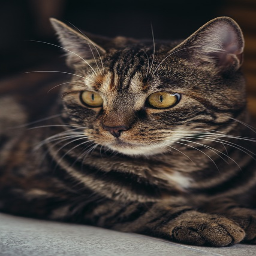

1/1 [==============================] - 0s 26ms/step
[[0.01851017]]
Cat


In [66]:
img_path = 'Catety.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img,(256,256))
cv2_imshow(img)
img = img/255
img = np.reshape(img,[1,256,256,3])
pred = model.predict(img)
print(pred)
if pred[0]>0.5:
  print('Dog')
else:
  print('Cat')

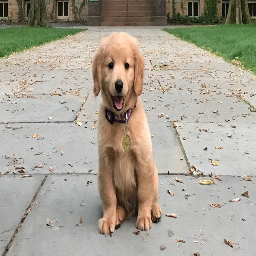

1/1 [==============================] - 0s 30ms/step
[[1.]]
Dog


In [67]:
img_path = 'adub.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img,(256,256))
cv2_imshow(img)
img = img/255
img = np.reshape(img,[1,256,256,3])
pred = model.predict(img)
print(pred)
if pred[0]>0.5:
  print('Dog')
else:
  print('Cat')

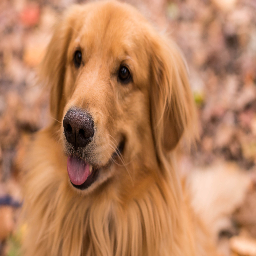

1/1 [==============================] - 0s 21ms/step
[[0.9992182]]
Dog


In [68]:
img_path = 'dogbreed.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img,(256,256))
cv2_imshow(img)
img = img/255
img = np.reshape(img,[1,256,256,3])
pred = model.predict(img)
print(pred)
if pred[0]>0.5:
  print('Dog')
else:
  print('Cat')